<a href="https://colab.research.google.com/github/lakshmisharma17/module20/blob/main/Capstone_Module20_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Add libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:



# Load the dataset
df = pd.read_csv('sample_data/housing.csv')

# Step 1: Handle missing values: Identify and address missing values
# using imputation or removal.

# Identify missing values
print("Missing values before handling:")
display(df.isnull().sum())

# Drop rows with any missing values
df_cleaned = df.dropna()

print("\nMissing values after handling:")
display(df_cleaned.isnull().sum())

# Display the shape of the data before and after dropping missing values
print("\nShape before dropping missing values:", df.shape)
print("Shape after dropping missing values:", df_cleaned.shape)

# Step 2: Handle duplicates: Check for and remove duplicate rows.
print("\nShape before dropping duplicates:", df_cleaned.shape)
df_cleaned = df_cleaned.drop_duplicates()
print("Shape after dropping duplicates:", df_cleaned.shape)

Missing values before handling:


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Missing values after handling:


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


Shape before dropping missing values: (20640, 10)
Shape after dropping missing values: (20433, 10)

Shape before dropping duplicates: (20433, 10)
Shape after dropping duplicates: (20433, 10)


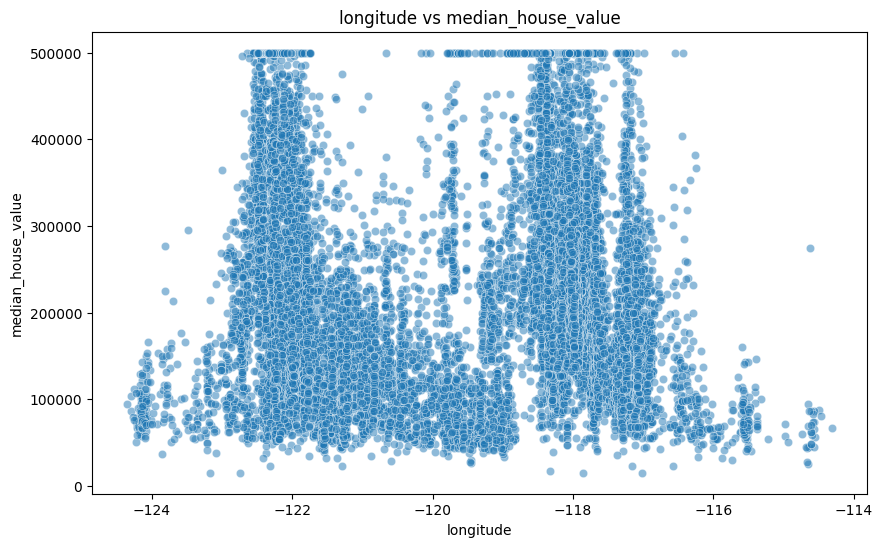

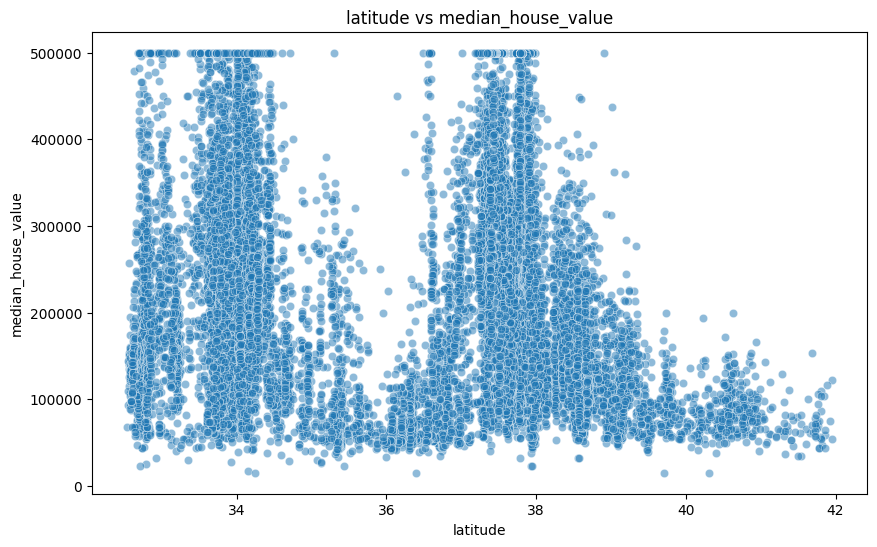

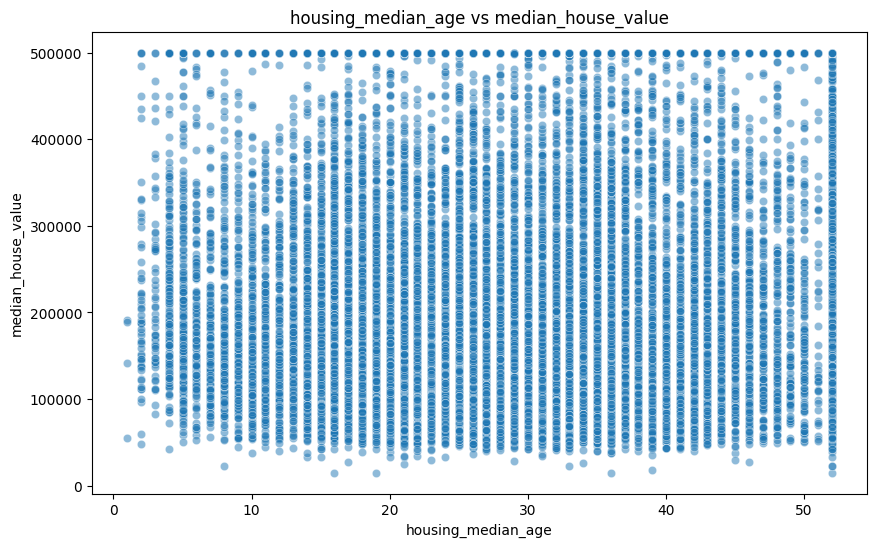

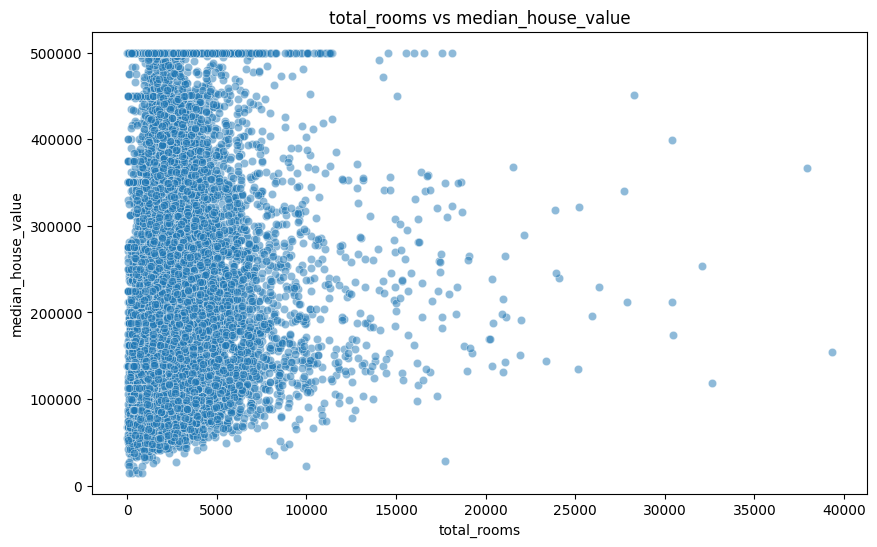

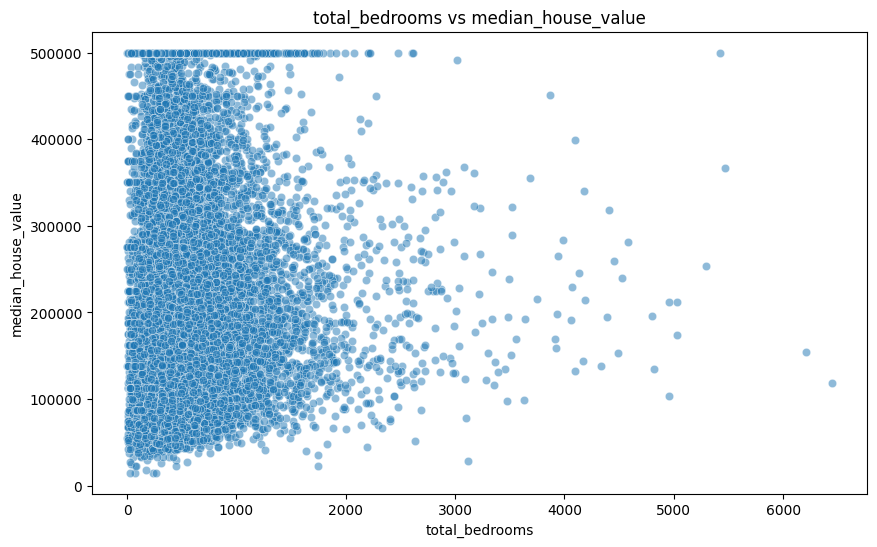

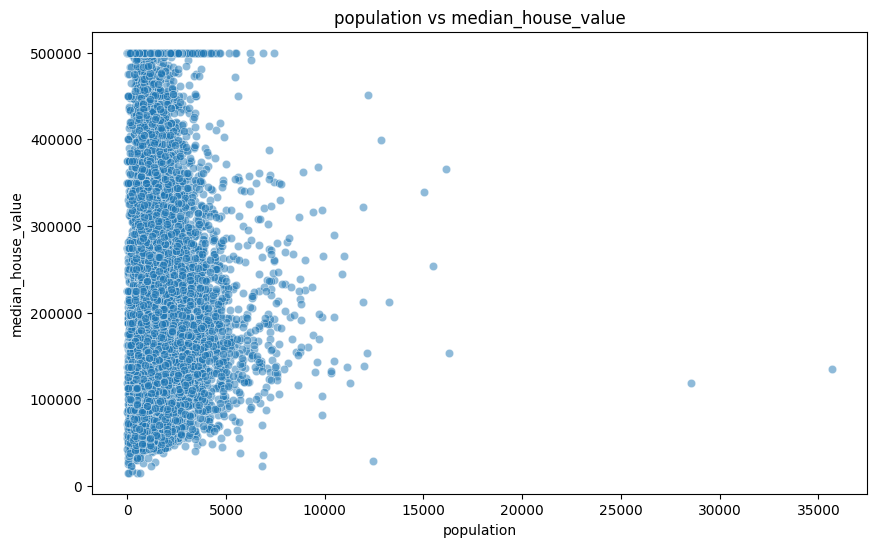

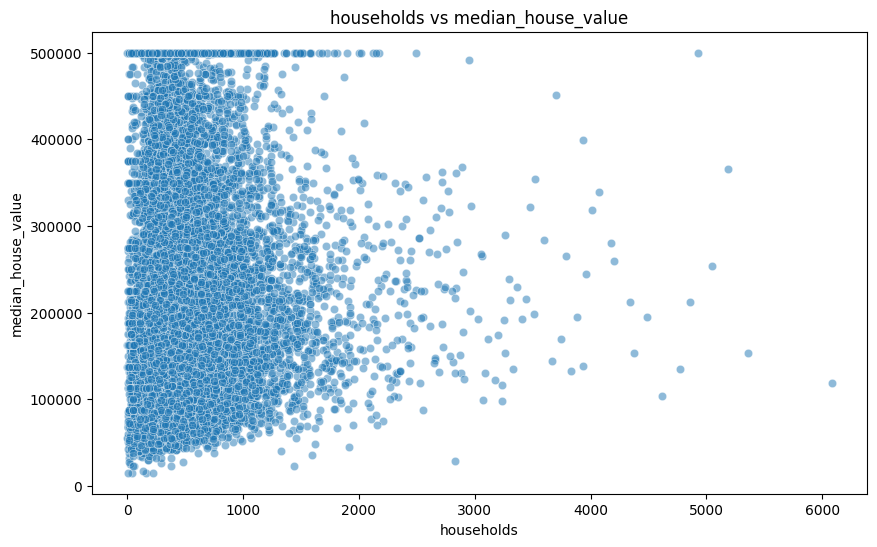

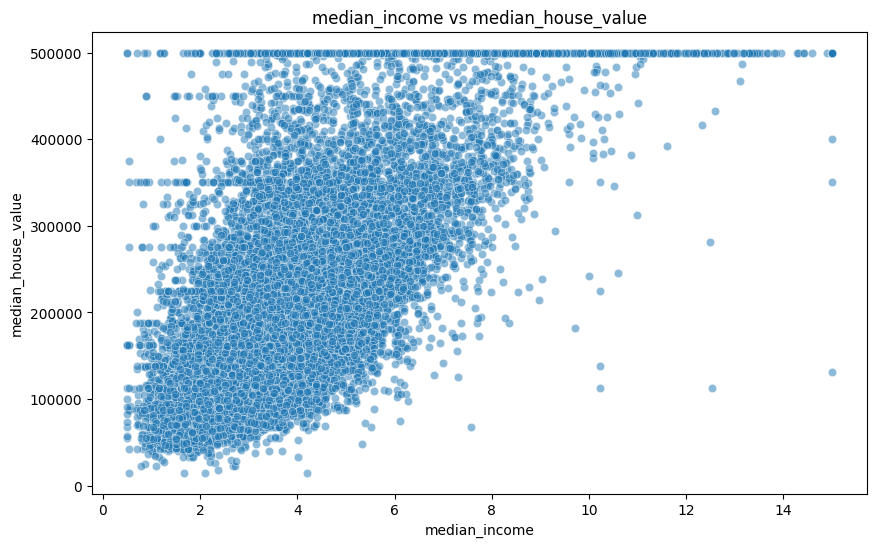

In [4]:
#Step 3:Identify and analyze outliers in the dataset.
#'median_house_value' is the dependent variable (price) and all other columns are
# indepdendent variaobles. To identify and remove outliers, use scatter graphs
# to visualize the relationship between the numeric independent variables, and
# the target variable 'median_house_value'
dependent_variable = 'median_house_value'
independent_variables = df_cleaned.select_dtypes(include=['number']).columns.tolist()
independent_variables.remove(dependent_variable) # Remove the dependent variable from the list

# Plotting independent variables against the dependent variable
for col in independent_variables:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_cleaned, x=col, y=dependent_variable, alpha=0.5)
    plt.title(f'{col} vs {dependent_variable}')
    plt.xlabel(col)
    plt.ylabel(dependent_variable)
    plt.show()

In [6]:
# Step 4: Feature Engineering

# Step 4.1: One-hot encode categorical features (assuming 'ocean_proximity' is the categorical column)
df_encoded = pd.get_dummies(df_no_outliers, columns=['ocean_proximity'], drop_first=True)

# Step 4.2: Create new features (examples: rooms per household, rooms that are bedroom, population per household)
df_engineered = df_encoded.copy()
df_engineered['rooms_per_household'] = df_engineered['total_rooms'] / df_engineered['households']
df_engineered['rooms_that_are_bedrooms'] = df_engineered['total_bedrooms'] / df_engineered['total_rooms']
df_engineered['population_per_household'] = df_engineered['population'] / df_engineered['households']

print("Shape of data after feature engineering:", df_engineered.shape)
display(df_engineered.head())

Shape of data after feature engineering: (17434, 16)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   

   population  households  median_income  median_house_value  \
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   
5       413.0       193.0         4.0368            269700.0   
6      1094.0       514.0         3.6591            299200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
2                   False                   False                      True   
3                   False                   False                      True   
4                   False                   False                      True   
5                   False                   False                      True   
6                   False                   False                      True   

   ocean_proximity_NEAR OCEAN  rooms_per_household  rooms_that_are_bedrooms  \
2                       False             8.288136                 0.129516   
3                       False             5.817352                 0.184458   
4                       False             6.281853                 0.172096   
5                       False             4.761658                 0.231774   
6                       False             4.931907                 0.192899   

   population_per_household  
2                  2.802260  
3                  2.547945  
4                  2.181467  
5                  2.139896  
6                  2.128405

## Summary of Data Cleaning and Feature Engineering Steps:

1.  **Handle Missing Values**: We identified and removed rows with missing values from the dataset.
2.  **Handle Duplicates**: We checked for and removed any duplicate rows.
3.  **Outlier Analysis**: We identified and removed outliers from the numerical columns using the IQR method.
4.  **Feature Engineering**:
    *   We performed one-hot encoding on the 'ocean\_proximity' categorical column.
    *   We created new features: 'rooms\_per\_household', 'bedrooms\_per\_room', and 'population\_per\_household'.

The resulting DataFrame `df_engineered` now contains the cleaned data with new engineered features.

In [7]:
display(df_engineered.head())

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   

   population  households  median_income  median_house_value  \
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   
5       413.0       193.0         4.0368            269700.0   
6      1094.0       514.0         3.6591            299200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
2                   False                   False                      True   
3                   False                   False                      True   
4                   False                   False                      True   
5                   False                   False                      True   
6                   False                   False                      True   

   ocean_proximity_NEAR OCEAN  rooms_per_household  rooms_that_are_bedrooms  \
2                       False             8.288136                 0.129516   
3                       False             5.817352                 0.184458   
4                       False             6.281853                 0.172096   
5                       False             4.761658                 0.231774   
6                       False             4.931907                 0.192899   

   population_per_household  
2                  2.802260  
3                  2.547945  
4                  2.181467  
5                  2.139896  
6                  2.128405

# Define a Model
Use the Engineering Dataframe from the last step of Data Analysis step.
Then, split the data into training and testing sets, select a baseline regression model, train it on the training data, evaluate its performance on the testing data using an appropriate metric, interpret the metric, and provide a rationale for its use.
Finally, display the code for plotting all independent variables against the dependent variable 'price' after removing duplicates and outliers from numerical columns.

## Split data

Split the engineered data into training and testing sets.


In [8]:
from sklearn.model_selection import train_test_split

X = df_engineered.drop('median_house_value', axis=1)
y = df_engineered['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (13947, 15)
Shape of X_test: (3487, 15)
Shape of y_train: (13947,)
Shape of y_test: (3487,)


## Select baseline model
Choose a suitable baseline regression model . We will choose Linear Regression.


In [10]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

## Train model
Train the baseline Linear Regression model using the training data.


In [12]:
baseline_model.fit(X_train, y_train)

LinearRegression()

## Evaluate model
Predict on the test data set and evaluate the model using appropriate regression metric. We will choose Mean Squared Error (MSE), Root Mean Squared error (RMSE) , and R-Squared Metrics.


In [13]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on the testing data
y_pred = baseline_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the calculated metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 3213623454.581111
Root Mean Squared Error (RMSE): 56688.830068904324
R-squared (R2): 0.631067570857748


**Reasoning**:
Interpret the calculated evaluation metrics and provide a rationale for using them.



In [15]:
# Interpretation of Metrics and Rationale

print("\nInterpretation of Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"RMSE (Root Mean Squared Error): {rmse}")
print(f"R-squared (R2): {r2}")

print("\nInterpretation:")
print(f"MSE represents the average squared difference between the actual and predicted housing values. A lower MSE indicates a better fit of the model to the data. The value of {mse:.2f} means, on average, the squared difference between the actual and predicted house prices is this amount.")
print(f"RMSE is the square root of the MSE and is in the same units as the target variable (median_house_value). It provides a more interpretable measure of the average prediction error. An RMSE of {rmse:.2f} means that, on average, the model's predictions are off by approximately ${rmse:.2f}.")
print(f"R-squared (R2) measures the proportion of the variance in the dependent variable (median_house_value) that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit. An R2 score of {r2:.4f} suggests that approximately {r2*100:.2f}% of the variance in median house values can be explained by the model.")

print("\nRationale for using these metrics:")
print("MSE and RMSE are commonly used to evaluate regression models because they quantify the average prediction error. RMSE is particularly useful as it is in the same units as the target variable, making it easier to understand the magnitude of the error.")
print("R-squared is used to assess how well the independent variables explain the variance in the dependent variable. It provides a measure of the goodness of fit of the model.")


Interpretation of Evaluation Metrics:
Mean Squared Error (MSE): 3213623454.581111
RMSE (Root Mean Squared Error): 56688.830068904324
R-squared (R2): 0.631067570857748

Interpretation:
MSE represents the average squared difference between the actual and predicted housing values. A lower MSE indicates a better fit of the model to the data. The value of 3213623454.58 means, on average, the squared difference between the actual and predicted house prices is this amount.
RMSE is the square root of the MSE and is in the same units as the target variable (median_house_value). It provides a more interpretable measure of the average prediction error. An RMSE of 56688.83 means that, on average, the model's predictions are off by approximately $56688.83.
R-squared (R2) measures the proportion of the variance in the dependent variable (median_house_value) that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit. An R2 score of 0.6311 suggests that

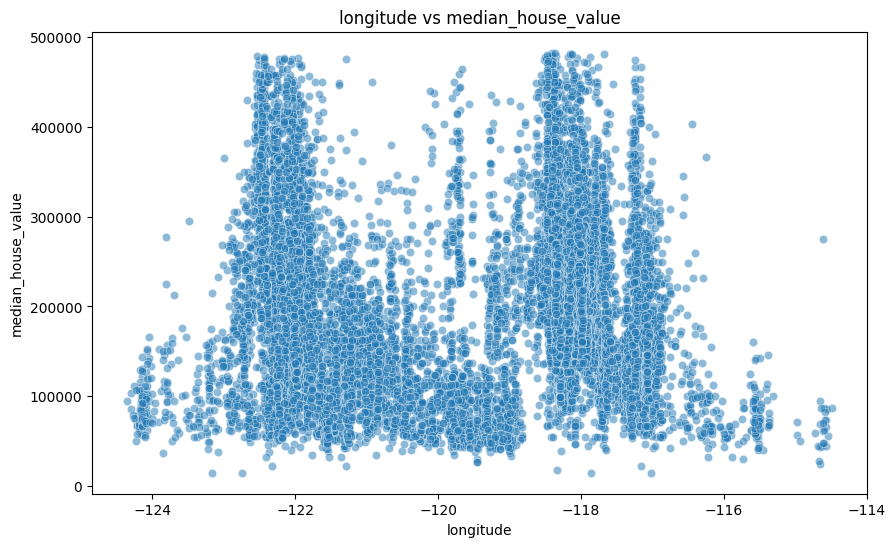

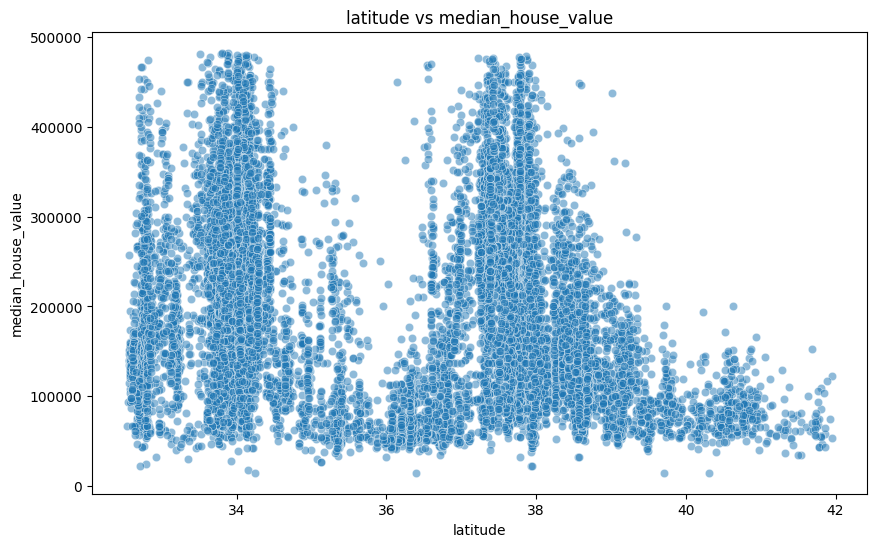

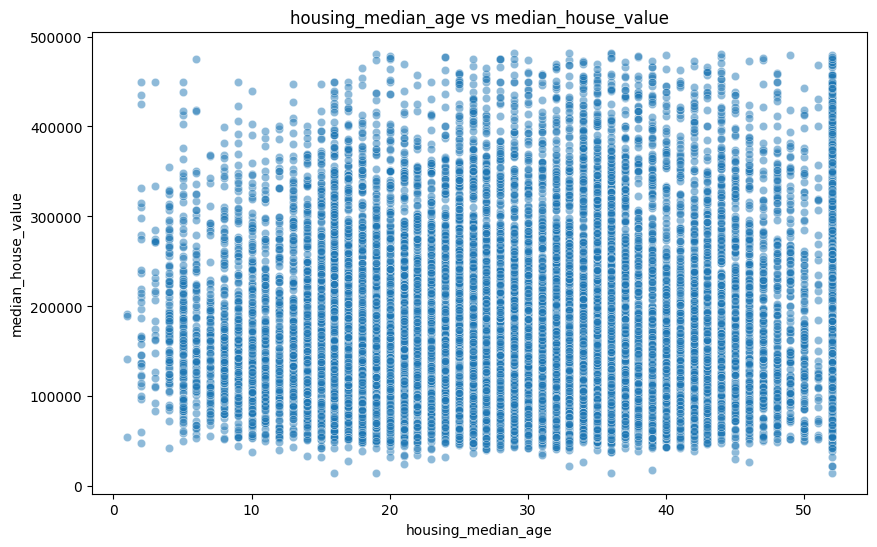

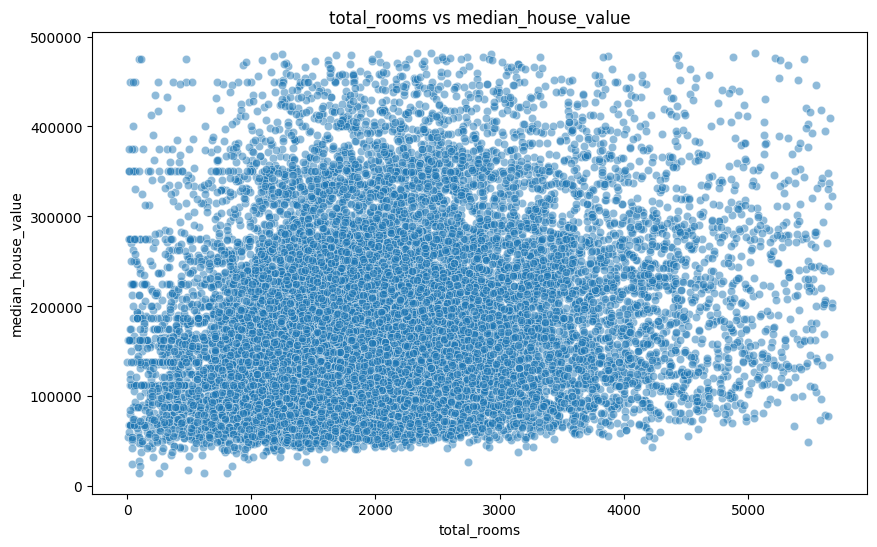

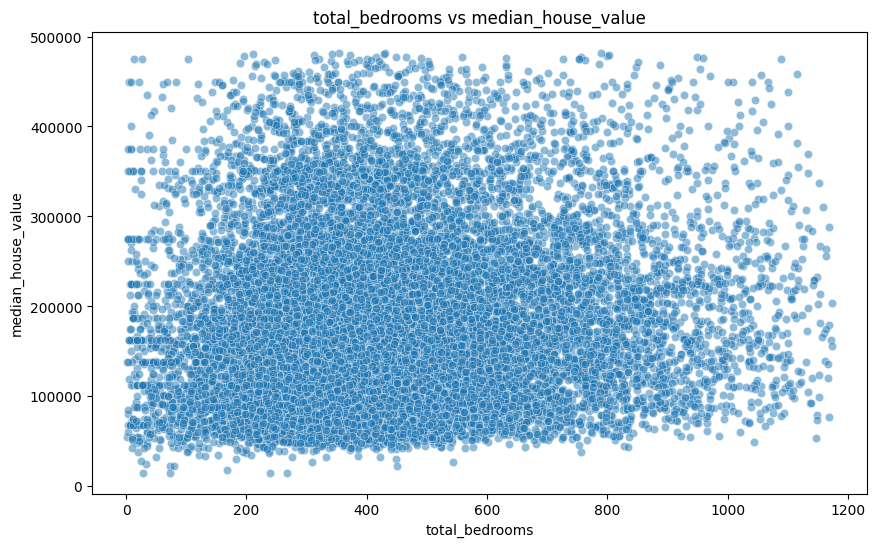

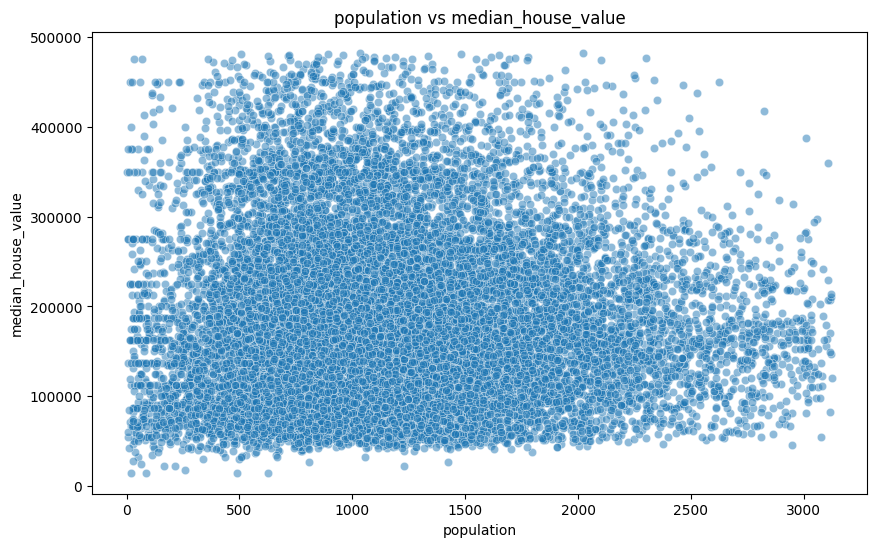

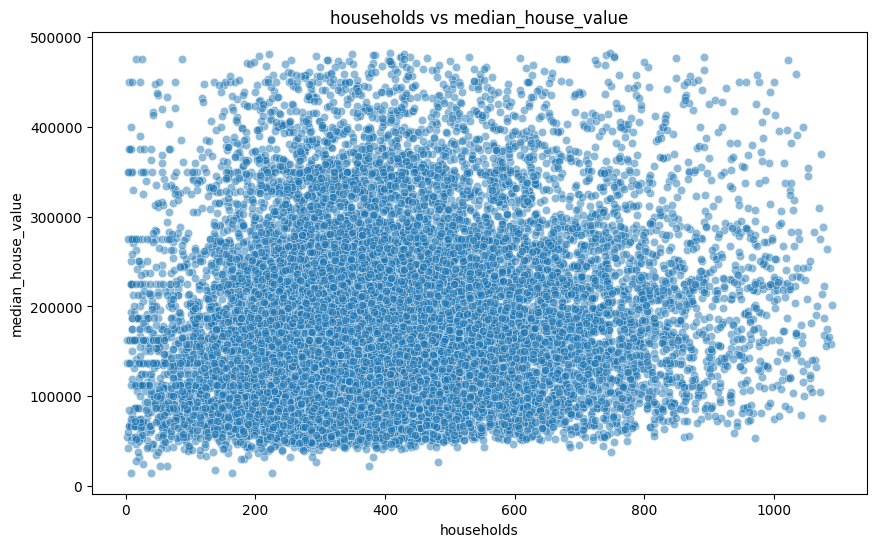

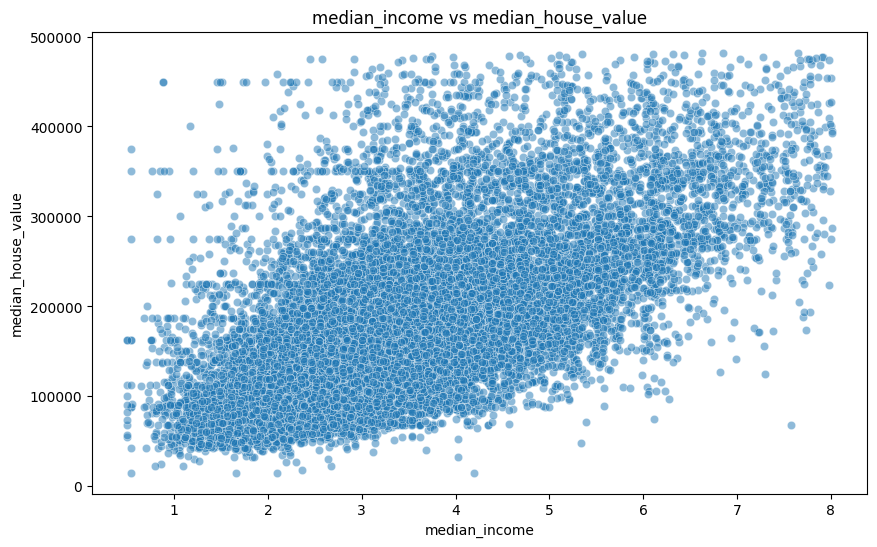

In [16]:
# Step 3:Identify and analyze outliers in the dataset.
#'median_house_value' is the dependent variable (price) and all other columns are
# indepdendent variaobles. To identify and remove outliers, use scatter graphs
# to visualize the relationship between the numeric independent variables, and
# the target variable 'median_house_value'
dependent_variable = 'median_house_value'
independent_variables = df_cleaned.select_dtypes(include=['number']).columns.tolist()
independent_variables.remove(dependent_variable) # Remove the dependent variable from the list

# Plotting independent variables against the dependent variable
for col in independent_variables:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_no_outliers, x=col, y=dependent_variable, alpha=0.5)
    plt.title(f'{col} vs {dependent_variable}')
    plt.xlabel(col)
    plt.ylabel(dependent_variable)
    plt.show()

## Interpret metric
Let us explain the meaning of the calculated evaluation metric in the context of predicting median house values.


In [18]:
# The MSE value is 3213623454.581111
# The RMSE value is 56688.8179906475
# The R2 value is 0.631067570857748

print("Interpretation of Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

print("\nInterpretation:")
print(f"Mean Squared Error (MSE) represents the average of the squared differences between the actual and predicted median house values. A lower MSE indicates that the model's predictions are closer to the actual values on average. The calculated MSE of {mse:.2f} provides a measure of the overall prediction error, but the squared units make it less intuitive to interpret in terms of the actual house value scale.")
print(f"Root Mean Squared Error (RMSE) is the square root of the MSE. This metric is particularly useful because it is in the same units as the target variable, 'median_house_value' (which is in dollars). An RMSE of {rmse:.2f} means that, on average, the model's predictions for median house values are off by approximately ${rmse:.2f}.")
print(f"R-squared (R2) is a measure of how well the independent variables in the model explain the variance in the dependent variable ('median_house_value'). It ranges from 0 to 1. An R2 score of {r2:.4f} indicates that approximately {r2*100:.2f}% of the variation in median house values can be explained by our model. A higher R2 value suggests a better fit of the model to the data.")

print("\nRationale for using these metrics:")
print("MSE and RMSE are standard metrics for evaluating regression models, providing a measure of the magnitude of the prediction errors. RMSE is preferred over MSE for interpretation because its values are in the same units as the target variable, making the error magnitude more understandable.")
print("R-squared complements MSE/RMSE by providing a measure of the proportion of the variance in the target variable explained by the model, giving an indication of the model's overall goodness of fit.")

Interpretation of Evaluation Metrics:
Mean Squared Error (MSE): 3213623454.58
RMSE (Root Mean Squared Error): 56688.83
R-squared (R2): 0.6311

Interpretation:
Mean Squared Error (MSE) represents the average of the squared differences between the actual and predicted median house values. A lower MSE indicates that the model's predictions are closer to the actual values on average. The calculated MSE of 3213623454.58 provides a measure of the overall prediction error, but the squared units make it less intuitive to interpret in terms of the actual house value scale.
Root Mean Squared Error (RMSE) is the square root of the MSE. This metric is particularly useful because it is in the same units as the target variable, 'median_house_value' (which is in dollars). An RMSE of 56688.83 means that, on average, the model's predictions for median house values are off by approximately $56688.83.
R-squared (R2) is a measure of how well the independent variables in the model explain the variance in t

## Rationale for metric
Explain Why the chosen evaluation metrics (MSE, RMSE, R-Squared) are suitable for evaluating this regression model and why RMSE is more interpretable than MSE in the context of the target variable (median_price).


In [19]:
# The MSE value is 3213623454.581111
# The RMSE value is 56688.8179906475
# The R2 value is 0.631067570857748

print("Interpretation of Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

print("\nInterpretation:")
print(f"Mean Squared Error (MSE) represents the average of the squared differences between the actual and predicted median house values. A lower MSE indicates that the model's predictions are closer to the actual values on average. The calculated MSE of {mse:.2f} provides a measure of the overall prediction error, but the squared units make it less intuitive to interpret in terms of the actual house value scale.")
print(f"Root Mean Squared Error (RMSE) is the square root of the MSE. This metric is particularly useful because it is in the same units as the target variable, 'median_house_value' (which is in dollars). An RMSE of {rmse:.2f} means that, on average, the model's predictions for median house values are off by approximately ${rmse:.2f}.")
print(f"R-squared (R2) is a measure of how well the independent variables in the model explain the variance in the dependent variable ('median_house_value'). It ranges from 0 to 1. An R2 score of {r2:.4f} indicates that approximately {r2*100:.2f}% of the variation in median house values can be explained by our model. A higher R2 value suggests a better fit of the model to the data.")

print("\nRationale for using these metrics:")
print("MSE and RMSE are standard metrics for evaluating regression models, providing a measure of the magnitude of the prediction errors. RMSE is preferred over MSE for interpretation because its values are in the same units as the target variable, making the error magnitude more understandable.")
print("R-squared complements MSE/RMSE by providing a measure of the proportion of the variance in the target variable explained by the model, giving an indication of the model's overall goodness of fit.")

Interpretation of Evaluation Metrics:
Mean Squared Error (MSE): 3213623454.58
RMSE (Root Mean Squared Error): 56688.83
R-squared (R2): 0.6311

Interpretation:
Mean Squared Error (MSE) represents the average of the squared differences between the actual and predicted median house values. A lower MSE indicates that the model's predictions are closer to the actual values on average. The calculated MSE of 3213623454.58 provides a measure of the overall prediction error, but the squared units make it less intuitive to interpret in terms of the actual house value scale.
Root Mean Squared Error (RMSE) is the square root of the MSE. This metric is particularly useful because it is in the same units as the target variable, 'median_house_value' (which is in dollars). An RMSE of 56688.83 means that, on average, the model's predictions for median house values are off by approximately $56688.83.
R-squared (R2) is a measure of how well the independent variables in the model explain the variance in t

## Summary:

### Data Analysis Key Findings

*   The engineered data was successfully split into training (80%) and testing (20%) sets, with shapes (13947, 15) for features and (13947,) for the target variable in the training set, and (3487, 15) and (3487,) respectively for the testing set.
*   A Linear Regression model was selected and instantiated as the baseline model.
*   The baseline Linear Regression model was successfully trained on the training data.
*   The model's performance on the testing data was evaluated using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2).
*   The calculated evaluation metrics are: MSE of approximately 3,213,623,454.58, RMSE of approximately 56,688.83, and R2 of approximately 0.6311.
*   The RMSE of \$56,688.83 indicates that, on average, the model's predictions for median house values are off by this amount.
*   The R2 score of 0.6311 suggests that approximately 63.11% of the variance in median house values can be explained by the independent variables in the model.
*   MSE and RMSE are suitable for quantifying prediction errors in regression, with RMSE being more interpretable as it's in the target variable's units. R-squared is appropriate for assessing the proportion of variance explained by the model.

### Insights or Next Steps

*   The baseline Linear Regression model explains a moderate amount of variance in housing prices (63.11%), but the average prediction error (RMSE) of approximately \$56,688.83 suggests there is room for improvement.
*   Future steps could involve exploring more complex regression models, performing further feature engineering, or hyperparameter tuning to potentially reduce the prediction error and increase the R-squared value.
